<font size=6>**Chapter 0: Object-oriented Programming in Python**</font>

<font size=1>

    Paolo Bonfini, 2025. All rights reserved.

This work is the intellectual property of `Paolo Bonfini`. All content produced in this notebook is original creation of the author unless specified otherwise. Unauthorized use, reproduction, or distribution of this material, in whole or in part, without explicit permission from the author, is strictly prohibited.
</font>

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

This notebook introduces to the concept of "object-oriented programming" in Python, and shows how this is applied in `scikit-learn`, which is the main library that will be used during the course.

The contents of this class will not be _strictly_ subject to examination, but constitute a fundamental knowledge to understand the rest of the class.  Therefore, make sure that the concepts presented here are within your grasp. 

# Classes and Objects

You can think of **classes** as "stamps". <br>
Similarly, you can think of **objects** are the things that the stamps can print on a paper.

$\rightarrow$ We usually say that objects are <u>instances</u> of a class

<div>
   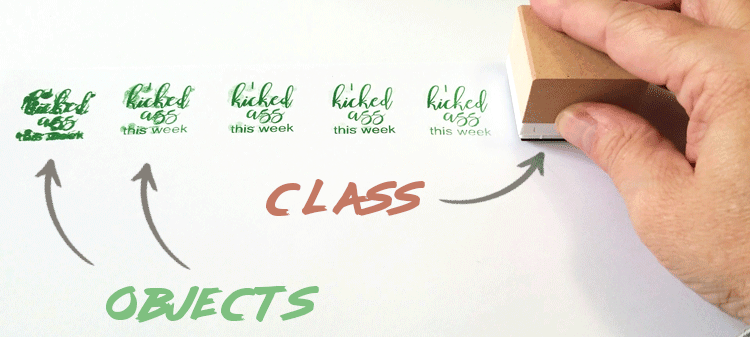
</div>

In other words, a class represents a "**template**" that can create an arbitrary number of duplicates (objects) which possess the same structure.

Let's have a look at a very basic class _definition_:

In [1]:
class Car():
    '''
    We define a class "Car", that we will later use to "print" cars.
    
    NOTE: Class names usually start with upper-case letters, while their
          objects use only lower-case letters.
    '''    
    
    def __init__(self, color):
        '''
        The `__init__` method is used to initialize the properties of the objects.
        In this case, we use it to initialize the property "color".
        
        As you can see, this function takes as additional input `self`, which
        is a special "parameter" saying that we are working with an instance
        of a class.
        '''    

        self.color = color
        '''
        Here we are saying:
            "Take the input color, and make it an attribute of the object"
        '''

Let's see how to <u>instantiate</u> (_create_) an object:

In [2]:
car_1 = Car('red')
'''
Notice that the `__init__` method is called implicitly!
We passed the color "red" to the "Car" class, and automatically `Car` forwards
it to `__init__`.
This always happen when we instatiate an object with some properties.
''';

# We can access the attributes simply by calling them:
car_1.color

'red'

Objects of a class are _similar_ (after all they come from the same "printer"), but **not identical**!

Each object has its own properties, e.g.:

In [3]:
car_2 = Car('green')

print('Car 1 is:', car_1.color)
print('Car 2 is:', car_2.color)

Car 1 is: red
Car 2 is: green


In [4]:
type(car_2)

__main__.Car

Once created, each object can be modified independently from the other objects:

In [5]:
# If you ever played GTA, you know that sometimes you need to change the color
# of your car because of ... erhm ... reasons.

car_1.color = 'yellow'
car_2.color = 'purple'

print('Car 1 is now:', car_1.color)
print('Car 2 is now:', car_2.color)

Car 1 is now: yellow
Car 2 is now: purple


# Attributes and Methods

As we saw, classes contain **attributes**, which are the <u>[modifiable] properties</u> of the objects.

But they can also contain **methods**, i.e., <u>functions that operate on the object itself</u>.

## Functions VS Methods

_To best explain methods, let's compare it againsta a "classical" function._

Let's first pretend we don't know how to use classes.  Then, to define a car and its color, we can use a _dictionary_.

In [6]:
car_1 = {'color': 'red'}
car_2 = {'color': 'green'}

To change a car's color with a **function**, we could simply do this:

In [7]:
def change_car_color(car, new_color):
    '''
    `car` is the generic input dictionary.
    `new_color` is the color we want to change to.
    '''
    car['color'] = new_color
    return car
    
# Let's apply the function:
car_1 = change_car_color(car_1, 'yellow')
car_2 = change_car_color(car_2, 'purple')

print('Car 1 is now:', car_1['color'])
print('Car 2 is now:', car_2['color'])

Car 1 is now: yellow
Car 2 is now: purple


Let's now do the same using a class with a dedicated **method**<br>
(_which, afterall, is just a standard function but placed inside a class_)

In [8]:
class Car():

    def __init__(self, color):
        self.color = color

    def change_color(self, new_color):
        '''
        Notice that now we don't need `car` as an input
        --> the method knows that we will apply it to `self`!
        '''
        self.color = new_color
        
# Let's instantiate the objects and apply the methods:
car_1 = Car('red')
car_2 = Car('green')

car_1.change_color('yellow')
car_2.change_color('purple')
'''See? We only need to pass the new color!''';

print('Car 1 is now:', car_1.color)
print('Car 2 is now:', car_2.color)

Car 1 is now: yellow
Car 2 is now: purple


# Why we need classes?

They are <u>convenient</u> $-$ the more you use them, the more you will understand.

Here are a few examples.

## To compact your code

As we saw with the car color, we can place all the code regarding "cars" into the `Car` class.

> $\rightarrow$ When we need to search our code for functions applying to cars, <u>we know where to look</u><br>
&emsp;&ensp;(_Trust me, this is extremely useful for big projects with lots of code_)

> $\rightarrow$ Allows to create compact documentations as well<br>
&emsp;&ensp;(_see later, `scikit-learn` docs_)

## To carry around lots of info without re-typing

Let's say I want to initialize many objects with the same properties:

In [9]:
import numpy as np

class Car():
    
    def __init__(self, color):
        self.color = color
        self.manifacturer = 'Hyundai'
        self.year_production = 1995
        self.doors = 4       
        self.engine = '1400cc'
        self.power = '100kW'

# Instantiating 10 cars with random colors:
cars = {}
for i in range(10):
    random_color = np.random.choice(['yellow', 'blue', 'purple', 'teal', 'green'])
    cars[i] = Car(random_color)
    
# Now accessing the attributes of car #5:
attributes_and_values = vars(cars[5])
#
for attribute, value in attributes_and_values.items():
    print(attribute, ":", value)

color : teal
manifacturer : Hyundai
year_production : 1995
doors : 4
engine : 1400cc
power : 100kW


## To easily invoke functions that change with the object

_SPOILER: This is the property most exploited by `scikit-learn`._

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

Let's say we want to create a model that changes with $\alpha$ and $\beta$, e.g.:
$$y = \alpha x + \beta$$

and assume we want to execute this in a loop of 10 iterations, where $\alpha$ and $\beta$ are taken at random.

Basically we will have to evaluate 10 slightly-different models (_every couple ($\alpha$, $\beta$) give rise to a different model_)

We want to
1. Inside the loop:
    - A) _evaluate each model performance_
    - B) _keep the best model we find_
2. Outisde the loop:
    - _apply a final calculation using the best model we found_

In [ ]:
import numpy as np
np.random.seed(42)

# Data:
class Model():
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
    
    def assess_performance(self, x):
        '''
        Fake method for demonstration purposes.
        
        Returns a random number between 0 and 1.
        '''
        return np.random.rand()
        
    def predict(self, x):
        '''
        This predicts y by calculating:
            alpha * x + beta
        
        Notice that we do not need to pass `alpha` and `beta`, because we can 
        already access them via `self` --- And this is the trick!
        '''
        y = self.alpha * x + self.beta
        return y    

In [ ]:
# Some data:
x = np.array([5,4,6,4,5,7,3,6,8,3,6,8,3])

# Sampling 10 random parameter couples (alpha, beta) and checking for best model:
for i in range(10):
    alpha = np.random.choice([0,1,2,3,4,5,6,7,8])
    beta  = np.random.choice([0,1,2,3,4,5,6,7,8])

    model = Model(alpha, beta)
    
    '''1.A - Evaluate each model performance'''
    performance = model.assess_performance(x)

    '''1.B - Keep the best model we find'''
    # (yes, not the best criterion, it's just an example ...)
    if performance > 0.8:
        best_model = model

'''2 - Apply a final calculation using the best model we found.'''
best_model.predict(x)
# Notice that `best_model` is itself an instance of class `Model`, therefore
# it has a `predict()` method

> In this case, we didn't have to keep track of the best `alpha` and `beta`<br>
$\rightarrow$We just had to store `best_model`, and all properties and methods are carried along!

In [ ]:
# Show the selected model's parameters:
vars(best_model)

<div style="border-left: 5px solid #FFA500; background-color: rgba(255, 165, 0, 0.15); padding: 10px; border-radius: 4px; color: inherit;">

<font size=6>**In-class Exercise [30 min]**</font>

**Objective:** Write an object-oriented code to manage the customers of an online store.

Every time a customer buys a product, the cost of that product increases for _that_ customer.

**Task:**  You will be given the _default_ `product_costs`, which are all equal to 1, at the begininning.
You will have to do the following.
1. Write a class that:
    - initializes a customer with the _default_ `product_costs`
    - has a `buy()` methodEvery time a customer buys a product, the cost of that product increases for _that_ customer.
 which takes as an input the name of a product, and the only thing it does is to call for `increase_price()`
    - has an `increase_price()` method which  takes as an input the name of a product, and it increases its price by +1
<br><br>
2. Instantiate a custumer object, and:
    - make it "buy" 3 times the same product
    - display the final price the customer sees

**Hints:**
- When you invoke internal attributes inside a class, remember to use `self`, e.g.:
    `self.product_costs`
- The same goes for methods, so when `buy()` calls for `increase_price()`, it should be something like:
    `self.increase_price()`
</div>

In [ ]:
######################################
######################################
# Replace "..." with the proper code #
######################################
######################################

# product_costs = {'tomatoes': 1, 'phone': 1, 'socks': 1}

# class Customer():
#     def ... # define __init__() method
    
#     def ... # define buy() method
    
#     def ... # define increase_price() method   

    
# customer = ... # instantiate customer
 
# ... # customer buys 3 times the same product

# print('Final cost of products:', ...)

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

_Our solution_

In [ ]:
product_costs = {'tomatoes': 1, 'phone': 1, 'socks': 1}

class Customer():
    def __init__(self, product_costs):
        self.product_costs = product_costs.copy()
    
    def buy(self, product):
#         if product not in self.product_costs.keys():
#             return "Product not available."
        self.increase_price(product)
    
    def increase_price(self, product):
         self.product_costs[product] += 1
            
customer = Customer(product_costs)
customer.buy('tomatoes')
customer.buy('tomatoes')
customer.buy('tomatoes')

print('Final cost of products:', customer.product_costs)
product_costs

# Sklearn (a.k.a. scikit-learn)

[Scikit-learn](https://scikit-learn.org/stable/) is a python library for Machine Learning and related tasks:

- Calssification
- Regression
- Clustering
- Dimensionality Reduction
- Model selection
- Preprocessing

## Classes in sklearn

Sklearn is heavily based on object-oriented programming ...

In [ ]:
# Let's generate some random data:
X = np.array([[0], [2], [3], [4], [5]])
y = [0.2, 0.4, 0.5, 0.8, 0.9]

from matplotlib import pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
'''Importing a [sub-]package class (a linear model, in this case).'''

model = LinearRegression()
'''Instantiating an object of `LinearRegression` class.'''

model.fit(X,y)
'''Invoking the `fit` method of `LinearRegression`, which will find the best
fit line through X and y.'''

'''Predicting the y values using the fitted model, using the `predict` method
of `LinearRegression` class.'''
yhat = model.predict(X)

In [ ]:
# Let's plot data and results:
from matplotlib import pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(X, y, c='C0', label='original data')
plt.scatter(X, yhat, c='tomato', label='predicted values\nfor the corresponding x')
plt.plot(X, yhat, c='tomato', label='model')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

<u>NOTE:</u> `sklearn` methods _always_ expect as an input `X` a 2D-array (_`y` may be 1D_).

So, when they are not, we need to 'pretend' they are. That is why we defined `X` as:

In [ ]:
X = np.array([[0], [2], [3], [4], [5]])
X.shape

and not the more "obvious":

In [ ]:
X_obvious = np.array([0, 2, 3, 4, 5])
X_obvious.shape

If we inspect their shapes, we see:

In [ ]:
print('Shape of NOT-sklearn-compliant X:', X_obvious.shape)
print('\tThis array has %s elements' % X_obvious.shape[0])
print('Shape of sklearn-compliant X:', X.shape)
print('\tThis array also has %s elements, but each of them has explicit dimension %s' % (X.shape[0], X.shape[1]))

It is just a matter of format $-$ in this case they are the **exact same** data. 

This only matter when X has more than 1 dimension, e.g. is 2D:

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=20)

X = np.array([[0, 0.2], [2.1, 2], [3.5, 3], [4, 4.7], [5.2, 5.9]])
y = [0.2, 0.4, 0.5, 0.8, 0.9]

ax.scatter(X[:,0], X[:,1], y)

ax.set_xlabel('X$_0$')
ax.set_ylabel('X$_1$')
ax.set_zlabel('y')

plt.show()

## Sklearn consistency

Sklearn is <u>extremely consistent</u> with its syntax and class definitions.

For example, all its regression models share the same syntax:

In [ ]:
from sklearn.linear_model import LinearRegression
#
model = LinearRegression()
model.fit(X,y)
model.predict(X)

# OR: 

from sklearn.linear_model import Ridge
#
model = Ridge()
model.fit(X, y)
model.predict(X)

# OR:

from sklearn.linear_model import Lasso
#
model = Lasso()
model.fit(X, y)
model.predict(X)

# etc.

You start seeing the convenience of using classes.

As a user, I only have to remember e.g. to use the `fit` method.
It has the same name for every algorithm!

## Sklearn main families

There are 3 main class families in Sklearn $\rightarrow$ they share the **same method names**

1. **Classifiers and Regressors**
    - `fit()`
    - `predict()`
    - `fit_predict()`
    
&emsp;&ensp; e.g. `LinearRegression`

2. **Transformers** (_for data pre-processing, normalization, etc._)
    - `fit()`
    - `transform()`
    - `fit_transform()`        
    - `inverse_transform()`
    
&emsp;&ensp; e.g. `StandardScaler`

3. **Clusterers**<br>
    These are more weird: depending on the algorithm they can have/_not_ have:

    - `fit()` $\leftarrow$ always
    - `predict()`
    - `fit_predict()`
    - `transform()`
    - `fit_transform()`        
    
&emsp;&ensp; e.g. `KMeans`    

## Let's read a documentation together

[`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

Notice:
- **usage**
- **source**
- **parameters** $\leftarrow$ _they are attributes we set_
- **attributes** $\leftarrow$ _they are attributes the algorithm sets_
- **methods**
